In [3]:
!pip install finance-datareader

In [1]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

code_data = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
code_data['종목코드'] = code_data['종목코드'].apply(make_code)
code_list = code_data[code_data['상장일'] < '2017-01-01']['종목코드']
code_data.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
2,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
3,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
4,DS단석,017860,기타 화학제품 제조업,바이오에너지,2023-12-22,12월,한승욱,http://dsdansuk.com,경기도


In [13]:
import FinanceDataReader as fdr
train = fdr.DataReader('000210', start = '2015', end = '2023').reset_index()
train.tail()

,Date,Open,High,Low,Close,Volume,Change
1964,2022-12-23,61100,61900,60800,61400,58748,-0.009677
1965,2022-12-26,61400,62000,61100,61700,52742,0.004886
1966,2022-12-27,61900,62600,61200,62300,121562,0.009724
1967,2022-12-28,61700,61900,60700,60800,74097,-0.024077
1968,2022-12-29,60300,60800,57900,59200,127800,-0.026316


In [14]:
test = fdr.DataReader('000210', start = '2023' ).reset_index()
test.head()

,Date,Open,High,Low,Close,Volume,Change
0,2023-01-02,58300,59900,56800,57200,68899,-0.033784
1,2023-01-03,57600,57600,54900,56700,97320,-0.008741
2,2023-01-04,57000,58300,55800,57700,42345,0.017637
3,2023-01-05,57300,58100,57000,58000,23640,0.005199
4,2023-01-06,57000,59800,56900,58700,59126,0.012069


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1969 non-null   datetime64[ns]
 1   Open    1969 non-null   int64         
 2   High    1969 non-null   int64         
 3   Low     1969 non-null   int64         
 4   Close   1969 non-null   int64         
 5   Volume  1969 non-null   int64         
 6   Change  1969 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 107.8 KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    246 non-null    datetime64[ns]
 1   Open    246 non-null    int64         
 2   High    246 non-null    int64         
 3   Low     246 non-null    int64         
 4   Close   246 non-null    int64         
 5   Volume  246 non-null    int64         
 6   Change  246 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 13.6 KB


In [19]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day

train.head()

test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day

test.head()

,Date,Open,High,Low,Close,Volume,Change,Year,Month,Day
0,2023-01-02,58300,59900,56800,57200,68899,-0.033784,2023,1,2
1,2023-01-03,57600,57600,54900,56700,97320,-0.008741,2023,1,3
2,2023-01-04,57000,58300,55800,57700,42345,0.017637,2023,1,4
3,2023-01-05,57300,58100,57000,58000,23640,0.005199,2023,1,5
4,2023-01-06,57000,59800,56900,58700,59126,0.012069,2023,1,6


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Defining the feature columns and target column
feature_cols = ['Volume', 'Year', 'Month', 'Day', 'Change']
target_col = 'Close'

# Features and Target
X = train[feature_cols]
y = train[target_col]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test,y_pred)
mse, r2_score

(7699600.246159647, 0.92100314757673)

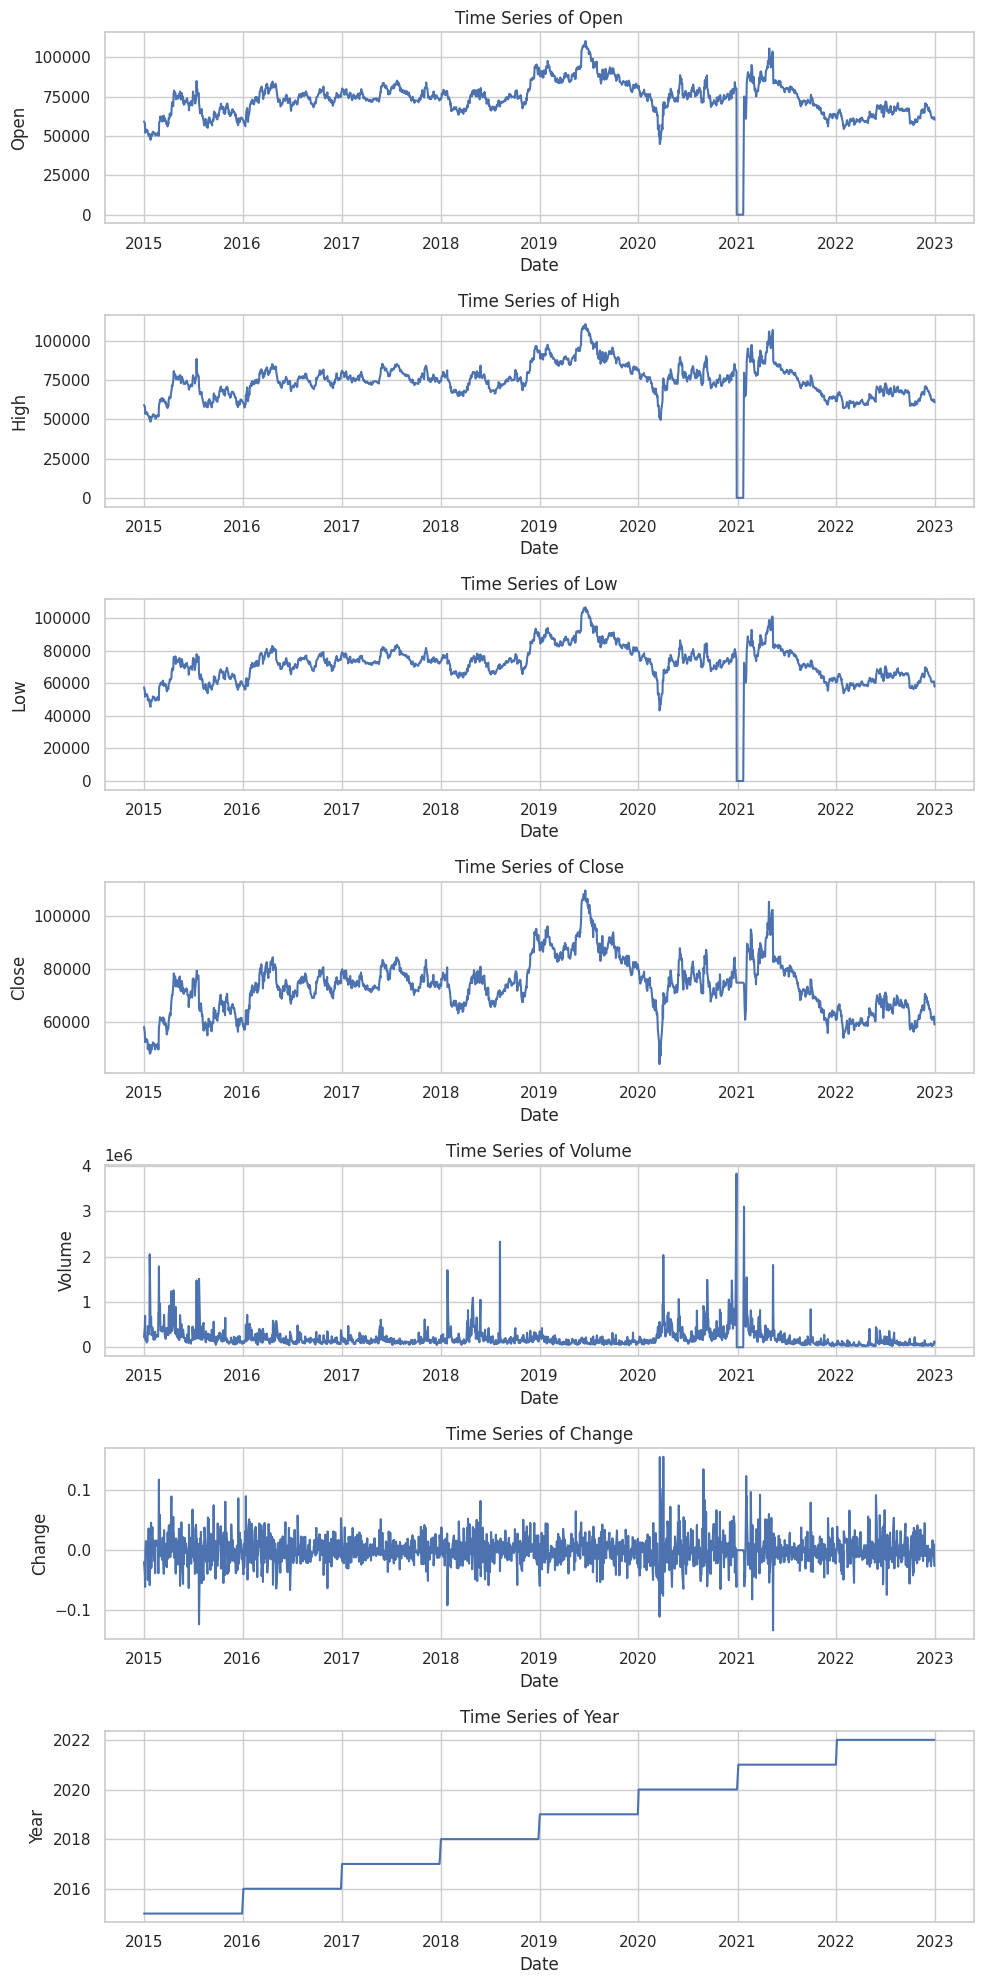

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting each column against the Date
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# List of columns to plot
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Year']

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.lineplot(x=train['Date'], y=train[col], ax=axes[i])
    axes[i].set_title(f'Time Series of {col}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)

# Adjusting layout
plt.tight_layout()
plt.show()


## sk 주식 종가 가져오기

In [29]:
sk_stock_data = fdr.DataReader('000660')

In [31]:
sk_stock_data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-09-10,718996,722547,697693,699467,6484220,NaN
1999-09-13,713670,723434,658636,704793,9861320,0.007614
1999-09-14,700356,702131,671063,674613,5921730,-0.042821
1999-09-15,680827,692367,662187,670175,4601060,-0.006579
1999-09-16,652422,655085,603602,607152,6970710,-0.094040


In [49]:
train = fdr.DataReader('000210', start = '1999', end = '2023').reset_index()
train.tail()

,Date,Open,High,Low,Close,Volume,Change
5749,2022-12-23,61100,61900,60800,61400,58748,-0.009677
5750,2022-12-26,61400,62000,61100,61700,52742,0.004886
5751,2022-12-27,61900,62600,61200,62300,121562,0.009724
5752,2022-12-28,61700,61900,60700,60800,74097,-0.024077
5753,2022-12-29,60300,60800,57900,59200,127800,-0.026316


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5754 non-null   datetime64[ns]
 1   Open    5754 non-null   int64         
 2   High    5754 non-null   int64         
 3   Low     5754 non-null   int64         
 4   Close   5754 non-null   int64         
 5   Volume  5754 non-null   int64         
 6   Change  5753 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 314.8 KB


In [50]:
test = fdr.DataReader('000210', start = '2023', end = '2024').reset_index()
test.head()

,Date,Open,High,Low,Close,Volume,Change
0,2023-01-02,58300,59900,56800,57200,68899,-0.033784
1,2023-01-03,57600,57600,54900,56700,97320,-0.008741
2,2023-01-04,57000,58300,55800,57700,42345,0.017637
3,2023-01-05,57300,58100,57000,58000,23640,0.005199
4,2023-01-06,57000,59800,56900,58700,59126,0.012069


## 주제 다시 설정

### 2022년까지 전체를 보고 2023 예측

In [73]:
!pip install einops
!pip install optuna
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error
import os
import pickle
import random
import torch
import torch.nn.functional as F
from torch.nn.utils import weight_norm
import math
import sys
import argparse
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
import json
import copy
import torchvision.ops

In [74]:
!git clone 'https://github.com/edwardhan925192/TimesNet.git'
%cd /content/TimesNet

from times_model import Model
from whole_dataset import TimeSeriesDataset,TimeSeries_ValDataset,TimeSeries_TestDataset
from schedular.scheduler import initialize_scheduler

Cloning into 'TimesNet'...
remote: Enumerating objects: 844, done.
remote: Counting objects: 100% (385/385), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 844 (delta 221), reused 270 (delta 156), pack-reused 459
Receiving objects: 100% (844/844), 281.87 KiB | 2.09 MiB/s, done.
Resolving deltas: 100% (482/482), done.
/content/TimesNet


In [75]:
seed = 0
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # for multi-GPU.
np.random.seed(seed)
random.seed(seed)  # Replace 42 with your chosen seed number

In [76]:
from pandas.tseries.offsets import YearEnd
from tqdm import tqdm

# validation 스플릿
def split_train_validation_timeseries(df, validation_ranges):
    '''
    takes list of validation range,
    Ex)   [(800, 900), (900, 1000)]

    returns rows previous of validation range and validation range.
    '''
    train_dfs = []
    validation_dfs = []

    for val_range in validation_ranges:
        # Ensure the range is valid
        start, end = val_range
        if start >= end or end > len(df):
            raise ValueError("Invalid range: {}".format(val_range))

        # Split the DataFrame
        validation_df = df.iloc[start:end]
        train_df = df.iloc[:start]

        train_dfs.append(train_df)
        validation_dfs.append(validation_df)

    return train_dfs, validation_dfs

# 결측치 채우기
def fill_missing_with_ratio(df, ratio, column2, column1):
    """
    If column 1 is missing, fill it by multiplying column 2 with the ratio.
    If column 2 is missing, fill it by dividing column 1 by the ratio.

    column 2 is bigger column

    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    ratio (float): The ratio to be used for filling missing values.
    column1 (str): The name of the first column.
    column2 (str): The name of the second column.

    Returns:
    pd.DataFrame: DataFrame with filled values.
    """
    if column1 not in df or column2 not in df:
        raise ValueError("Specified columns must be in the DataFrame")

    # If column1 is missing, fill it by multiplying column2 with the ratio
    df[column1] = df.apply(lambda row: row[column2] * ratio if pd.isna(row[column1]) else row[column1], axis=1)

    # If column2 is missing, fill it by dividing column1 by the ratio
    df[column2] = df.apply(lambda row: row[column1] / ratio if pd.isna(row[column2]) else row[column2], axis=1)

    return df

# 결측치 채우기2
def interpolate_columns(df, columns):
    """
    Interpolates missing values in specified columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    columns (list of str): List of column names in which to interpolate missing values.

    Returns:
    pd.DataFrame: DataFrame with interpolated values in the specified columns.
    """
    for column in columns:
        if column in df.columns:
            df[column] = df[column].interpolate(method='linear', limit_direction='forward', axis=0)
        else:
            print(f"Column '{column}' not found in DataFrame.")
    return df

def convert_datetime_column(df, column_name):
    # Define a helper function to extract date-time components and differentiate between weekends and weekdays
    def extract_date_time_components(datetime_str):
        # Check if the hour component is present in the datetime string
        if ':' in datetime_str or ' ' in datetime_str and len(datetime_str.split(' ')[1]) > 0:
            dt_format = '%Y-%m-%d %H'
        else:
            dt_format = '%Y-%m-%d'

        dt_obj = datetime.strptime(datetime_str, dt_format)
        weekday = dt_obj.weekday()

        # Classify as 'Weekend' or 'Weekday'
        day_type = 'Weekend' if weekday in [5, 6] else 'Weekday'

        # Return components based on the presence of the hour component
        if dt_format == '%Y-%m-%d %H':
            return dt_obj.year, dt_obj.month, dt_obj.day, dt_obj.hour, day_type
        else:
            return dt_obj.year, dt_obj.month, dt_obj.day, None, day_type

    # Apply the helper function to the specified column
    components = df[column_name].apply(extract_date_time_components)

    # Unpack components and create columns conditionally
    df['Year'], df['Month'], df['Day'], hour_component, df['DayType'] = zip(*components)
    if any(hour is not None for hour in hour_component):
        df['Hour'] = hour_component

    return df


columns_info = {
    'Month': 12,
    'Hour': 23,
    'Day':31
}

def fill_column_from_dfB_to_dfA(dfA, dfB, column_name):
    """
    Fill values of a column in dfA with values from the same column in dfB.

    Parameters:
    dfA (pd.DataFrame): The dataframe to be updated.
    dfB (pd.DataFrame): The dataframe providing the new values.
    column_name (str): The name of the column to be updated.
    """
    # Check if the column exists in both dataframes
    if column_name in dfA.columns and column_name in dfB.columns:
        # Determine the number of rows to update
        num_rows_to_update = min(len(dfA), len(dfB))

        # Update the values in dfA from dfB
        dfA.loc[:num_rows_to_update - 1, column_name] = dfB.loc[:num_rows_to_update - 1, column_name]
    else:
        raise ValueError("Column not found in one or both dataframes")

    return dfA

In [77]:
from validation_split import split_train_validation_timeseries
train = fdr.DataReader('000210', start = '1999', end = '2023').reset_index()
train.tail()
sample_submission = pd.read_csv('/content/sample_submission.csv')
train = train.drop(['Date'],axis = 1)
test = test.drop(['Date'],axis = 1)


KeyError: ignored

In [78]:
# 스케줄러 설정
class SchedulerConfig:
    def __init__(self):
        # STARTS from lr goes down to eta_min in T_0
        self.CosineAnnealingWarmRestarts = {'T_0': 10, 'T_mult': 1, 'eta_min': 0.0005}
        self.StepLR = {'step_size': 10, 'gamma': 0.1}
        self.ExponentialLR = {'gamma': 0.95}

        #steps_per_epoch should be set to number of batches , epochs should be total number of epochs
        # Starts from low lr to max lr
        self.OneCycleLR = {'max_lr': 0.01, 'steps_per_epoch': 10, 'epochs': 20}

        self.CyclicLR = {'base_lr': 0.001, 'max_lr': 0.01, 'step_size_up': 5,'step_size_down':5,  'mode': 'triangular'}

    def get_params(self, scheduler_name):
        return getattr(self, scheduler_name, None)

num_features = 6
target_name = 'Close'

# 모델 파라미터 설정
class Config:
    def __init__(self):
        self.task_name = 'short_term_forecast'
        self.seq_len = 365
        self.window_shift = 1
        self.enc_in = num_features
        self.d_model = 22
        self.top_k = 3
        self.d_ff = 22
        self.num_kernels = 6
        self.dropout = 0.24915726313968972
        self.e_layers = 1
        self.label_len = num_features
        self.target_col = target_name
        self.cnn_type = 'inceptionv1'
        self.pred_len = 358
        self.c_out = 1
        self.eval_range = 0
        self.seq_range = np.concatenate([np.arange(0, 45), np.arange(317, 358)])
        self.scheduler_config = SchedulerConfig()
        self.scheduler_name = 'CosineAnnealingWarmRestarts'
        self.scheduler_update_type = 'epoch'
    def update(self, new_params):
        for key, value in new_params.items():
            if hasattr(self, key):
                setattr(self, key, value)
winter_configs = Config()

In [79]:
class SchedulerConfig:
    def __init__(self):
        # STARTS from lr goes down to eta_min in T_0
        self.CosineAnnealingWarmRestarts = {'T_0': 10, 'T_mult': 1, 'eta_min': 0.0005}
        self.StepLR = {'step_size': 10, 'gamma': 0.1}
        self.ExponentialLR = {'gamma': 0.95}

        #steps_per_epoch should be set to number of batches , epochs should be total number of epochs
        # Starts from low lr to max lr
        self.OneCycleLR = {'max_lr': 0.01, 'steps_per_epoch': 10, 'epochs': 20}

        self.CyclicLR = {'base_lr': 0.001, 'max_lr': 0.01, 'step_size_up': 5,'step_size_down':5,  'mode': 'triangular'}

    def get_params(self, scheduler_name):
        return getattr(self, scheduler_name, None)

num_features = 6
target_name = 'Close'

class Config:
    def __init__(self):
        self.task_name = 'short_term_forecast'
        # Output features and c_out should be the same when the task is anomaly_detection
        self.seq_len = 365
        self.window_shift = 1
        self.enc_in = num_features    # Features
        self.d_model = 20     # Convolution Embedding dimension AFTER RESHAPING
        self.top_k = 3        # FFT frequency
        self.d_ff = 20       # Convolution Output layer dimension AFTER RESHAPING
        self.num_kernels = 6  # inception block Num of different grid cells used / If using dcvn set it to 3
        self.dropout = 0.1933493411095017    # Dropout rate
        self.e_layers = 1     # num Timeblock
        self.label_len = num_features   # Features
        self.target_col = target_name   # Name of target column
        self.cnn_type = 'inceptionv1' # dcvn (KERNEL = 3), inceptionv1, inceptionv2, res_dcvn, res_inceptionv1, res_inceptionv2
        self.pred_len = 358   # Prediction length
        self.c_out = 1        # Output feature
        self.eval_range = 0
        self.seq_range = np.arange(45, 317)
        self.scheduler_config = SchedulerConfig()
        self.scheduler_name = 'CosineAnnealingWarmRestarts' #'CosineAnnealingWarmRestarts', 'StepLR', 'ExponentialLR', 'OneCycleLR', 'CyclicLR'
        self.scheduler_update_type = 'epoch' # epoch, batch
    def update(self, new_params):
        for key, value in new_params.items():
            if hasattr(self, key):
                setattr(self, key, value)

xwinter_configs = Config()

In [80]:
df_train = train
target_col = None
learning_rate = 0.01
num_epochs = 10
batch_sizes = 30
configs = winter_configs #winter_configs, xwinter_configs
df_test = train

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5754 non-null   int64  
 1   High    5754 non-null   int64  
 2   Low     5754 non-null   int64  
 3   Close   5754 non-null   int64  
 4   Volume  5754 non-null   int64  
 5   Change  5753 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 269.8 KB


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_state = None

training_loss_history = []

col_list = list(df_train.columns)
target_index = col_list.index(target_col) if target_col in col_list else -1

criterion = nn.L1Loss()

model = Model(configs).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = initialize_scheduler(optimizer, configs)

train_dataset = TimeSeriesDataset(df_train, configs.seq_len, configs.pred_len, configs.seq_range, configs.eval_range)
train_loader = DataLoader(train_dataset, batch_size=batch_sizes, shuffle=False)

for epoch in range(num_epochs):

    model.train()
    total_loss = 0

    for batch_idx, (batch_data, batch_target) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}")):
        batch_data, batch_target = batch_data.to(device), batch_target.to(device)
        optimizer.zero_grad()
        outputs = model(batch_data)

        loss = criterion(outputs, batch_target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    scheduler.step()

    average_training_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Training_Loss = {average_training_loss}')
model_state = copy.deepcopy(model.state_dict())

test_dataset = TimeSeries_TestDataset(df_test, configs.seq_len)
test_loader = DataLoader(test_dataset, batch_size=batch_sizes, shuffle=False)

model.eval()

with torch.no_grad():
    for batch_test_data in test_loader:
        batch_test_data = batch_test_data.to(device)
        outputs = model(batch_test_data)

winter_pred = outputs

Epoch 1/10:  60%|██████    | 101/168 [06:17<04:03,  3.63s/it]